_______
## Boosting & Adaboost
_______

## Définition du boosting ##
C'est une méthodologie appliquée à un algorithme de machine learning existant, le plus souvent à un arbre de décision car c'est là qu'il donne les meilleurs résultats.


L'objectif du boosting est de créer un modèle fort à partir de plusieurs modèles plus faibles. Concrètement, cela combine les prédictions de plusieurs modèles. Ces modèles sont de préférences simples et faibles. Dans le but d'améliorer la robustesse et la précision du modèle final.

** Fonctionnement **

Contrairement au bagging, le boosting va se construire de manière itérative, séquentielle. En fait, chaque modèle va essayer de corriger les erreurs de modèle n-1.

A chaque itération, le boosting permet d'augmenter le poids des observations mal classées pour que le modèle suivant se concentre sur les cas difficiles. On peut voir cela comme une analyse qui augmente sa finesse au fur et à mesure, comme dans un entonnoir.

Pour cela, on va utiliser des modèles faibles ("Stumps"). Concrètement, l'idée est de corriger progressivement au lieu d'utiliser un modèle de machine de guerre dès le départ.

**Il existe deux types de boosting**

- *AdaBoost(Adaptive Boosting)* 
- *Gradient Boosting*

Dans ce notebook, nous nous intérésserons d'abord à Adaboost.

## Comment marche l'algorithme d'Adaboost? ##


Adaboost fonctionne selon un schéma itératif:

    1. AdaBoost commence par entraîner un modèle de machine learning simple sur le jeu de données d'entraînement. Ce modèle simple est appelé un "classifieur faible". Il peut s'agir par exemple d'un arbre de décision très peu profond:

![Capture d’écran du 2024-01-19 12-25-48.png](<attachment:Capture d’écran du 2024-01-19 12-25-48.png>)


    2. Pondération des erreurs: AdaBoost attribue des poids à chaque exemple d'entraînement en fonction de la précision du classifieur faible. Les exemples mal classés reçoivent un poids plus élevé, incitant l'algorithme à se concentrer davantage sur ces exemples lors des étapes suivantes.
![Capture d’écran du 2024-01-19 12-26-27.png](<attachment:Capture d’écran du 2024-01-19 12-26-27.png>)

    3. Entraînement Itératif : AdaBoost continue d'itérer en ajoutant des classifieurs faibles, chaque nouvel ajout se concentrant sur les exemples mal classés de l'itération précédente. Chaque classifieur faible est entraîné de manière séquentielle, et à chaque étape, les poids des exemples sont ajustés pour donner plus d'importance aux erreurs antérieures.

![Capture d’écran du 2024-01-19 12-40-03.png](<attachment:Capture d’écran du 2024-01-19 12-40-03.png>)

    4. Combinaison Pondérée : Les classifieurs faibles sont pondérés en fonction de leur précision, et leurs prédictions sont combinées pour former un modèle fort. Les classifieurs les plus précis ont un poids plus important dans la prédiction finale.

    ![Capture d’écran du 2024-01-19 12-42-30.png](<attachment:Capture d’écran du 2024-01-19 12-42-30.png>)

    5. Prédiction Finale : L'algorithme combine les prédictions de tous les classifieurs faibles pondérés pour obtenir une prédiction finale plus précise et robuste.
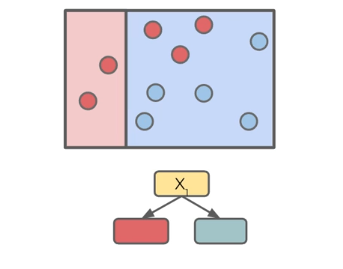
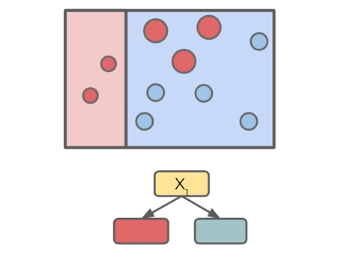
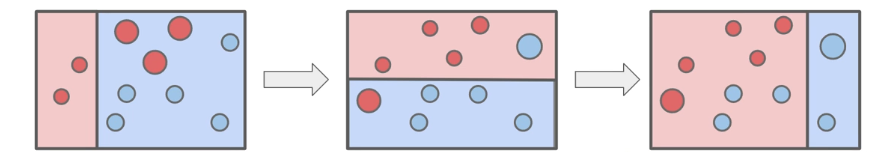
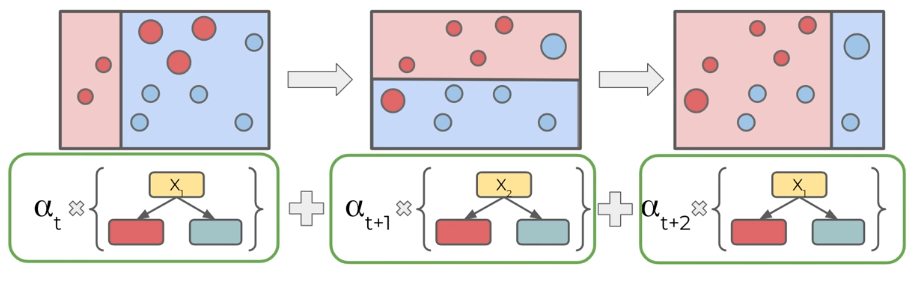

#### En bref ####

Adaboost utilise des arbres décisionnels, à seulement 2 branches et 2 feuilles (aussi appelés souches). Un ensemble d'apprenants faibles qui apprennent lentement en série.
Certains apprenants faibles ont plus de poids dans le résultat final que d'autres en raison du paramétre alpha qui est grand lorsque l'apprenant prédis bien la sortie.
Les « weak learners » d’AdaBoost sont généralement des arbres décisionnels  mais on peut utiliser d’autres types de classificateur.

#### Hyperparamétres importants


n_estimators : c'est le taux d'apprentissage, plus il est élevé, plus le modéle est sensible aux erreurs dans les données d'entraînement

learning_rate : un taux d'apprentissage de zéro peut conduire à une convergence rapide du modèle, mais cela peut également entraîner un surajustement aux données d'entraînement, car le modèle accorde une importance égale à tous les estimateurs, même s'ils ont des performances différentes.

base_estimator: l'apprenant faible pour entrainer le modéle. Par défaut, c'est un DecisionTreeClassifier.

### Exemple d'implémentation sur le dataset Iris

Dans la phase de construction du modèle, vous pouvez utiliser l'ensemble de données IRIS, qui est un problème de classification multi-classes très célèbre. Cet ensemble de données comprend :
    * 4 caractéristiques (longueur du sépale, largeur du sépale, longueur du pétale, largeur du pétale),
    * une variable cible (le type de fleur): Setosa, Versicolour et Virginica.
    
L'ensemble de données est disponible dans la bibliothèque scikit-learn, ou vous pouvez également le télécharger depuis la bibliothèque UCI Machine Learning.

In [2]:
# Importer les librairies requises
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Importer la fonction train_test_split
from sklearn.model_selection import train_test_split
#Import le module metrics pour le calcul de l'accuracy
from sklearn import metrics

In [3]:
# Charger les données
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [4]:
# Diviser le dataset en training set et test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training-30% test

In [11]:
#Construire le modèle adaboost

# Créer l'objet classifieur en fixant le nombre d'arbres de décision à 50 (n_estimators) et la contribution de chaque arbre à la prédiction finale (learning_rate)
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)

# Entraîner l'objet classifieur
model = abc.fit(X_train, y_train)

# Prédire la réponse pour le dataset test
y_pred = model.predict(X_test)

# Accéder à l'importance des caractéristiques
feature_importance = model.feature_importances_

# Associer les importances aux noms des caractéristiques
feature_importance_dict = dict(zip(df.columns, feature_importance))

# Afficher les noms des caractéristiques et leurs importances
for feature, importance in feature_importance_dict.items():
    print(f"{feature}: {importance}")


sepal length (cm): 0.0
sepal width (cm): 0.0
petal length (cm): 0.52
petal width (cm): 0.48


In [10]:
# Calcul de l'accuracy score, à compléter
print('Accuracy:',) 


Accuracy: 1.0


#### Questions

1. Comment interpréter les features_importance dans cet exemple ?

2. Qu'évalue l'accuracy ? 